# Logistic Regression with TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import logging

## Generate data

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=5)

## Split train and test data

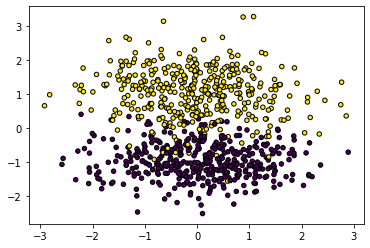

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=20, edgecolor='k')

## Layers

In [4]:
input_layer = tf.keras.layers.Input(shape=[2])
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(input_layer)

## Model

In [5]:
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Training

In [6]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, verbose=False)

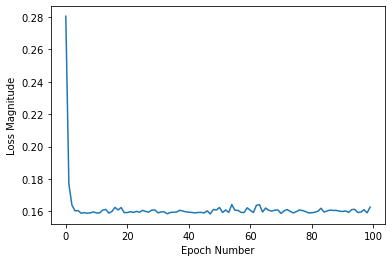

In [7]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [8]:
e = model.evaluate(X_test, y_test, verbose=False)
w = model.get_weights()

In [9]:
print(e)
print(w)

[0.1781379336118698, 0.955]
[array([[0.05286638],
       [4.594332  ]], dtype=float32), array([0.37105733], dtype=float32)]


In [10]:
pred = model.predict(X)

In [11]:
pred_y = np.reshape(pred, pred.size, order='F') 

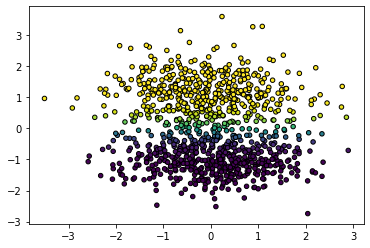

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred_y, s=20, edgecolor='k')